<a href="https://colab.research.google.com/github/reeyasingh021/DataManagementFinalProject/blob/main/DataManagement_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Datasets

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
import pandas as pd
data1 = pd.read_csv('/content/NY-House-Dataset.csv')
data2 = pd.read_csv('/content/NYPD_Arrests.csv', on_bad_lines='skip')

In [ ]:
data1.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [ ]:
data2.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
2,173113513,12/31/2017,849,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
3,173113423,12/31/2017,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074
4,173113421,12/31/2017,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811


# NY House Dataset - Data Cleaning

In [ ]:
clean1 = data1.copy()

# Check for missing values and duplicates ----
print(f"The amount of missing values in data1 is {data1.isna().sum().sum()}.")
print(f"The amount of duplicates in data1 is {data1.duplicated().sum()}.")

clean1 = clean1.drop_duplicates()
print(f"The amount of duplicates in clean1 is {clean1.duplicated().sum()}.")

The amount of missing values in data1 is 0.
The amount of duplicates in data1 is 214.
The amount of duplicates in clean1 is 0.


In [ ]:
# Standardize numeric data ----
#print(clean1.dtypes)
# PRICE, BEDS, BATH, PROPERTYSQFT, LATITUDE, LONGITUDE

clean1['BATH'] = clean1['BATH'].astype(int)
clean1['PROPERTYSQFT'] = clean1['PROPERTYSQFT'].astype(int)

# Handle outliers ----
#print(data1['BATH'].describe())
#print(data1['BEDS'].describe())
#print(data1['PRICE'].describe())
#print(data1['PROPERTYSQFT'].describe())

# Note that multi-family homes will naturally have high numbers of beds/baths. Manually remove unfeasible ratios of bed/baths.

bed_bath_subset = clean1[['BEDS','BATH']]
mu_bed_bath = bed_bath_subset.mean()
sigma_bed_bath = bed_bath_subset.std()
z_bed_bath = (bed_bath_subset - mu_bed_bath)/sigma_bed_bath

threshold = 4 # Detect only extreme outliers
outlier_mask = (abs(z_bed_bath > threshold)).any(axis=1)
outliers = clean1.loc[outlier_mask, ['BEDS','BATH']]
print(f"List of outlier values: {outliers}")

clean1.drop([4691,622], inplace=True)
### TODO: Do we also remove extermely large apartment buildings? ###

List of outlier values:       BEDS  BATH
7        8    16
232     15     9
469     15     6
550     14     8
622      3    32
631     10    13
733     16     8
750     20    10
765     35    16
936     16    16
1092    24     8
1143    50    50
1214    20    20
1410    20     8
1825    11    11
1945    16     8
1999    14     6
2076     9    11
2265    32    12
2488    36    16
2564    24    24
2653    42    43
3276    40    20
3568    15     7
3589    32    12
3603    30    20
4023    16     8
4129    14     7
4191    19     8
4240    24    16
4251    15    10
4261    14     6
4282    14     9
4404    18    12
4523    14     6
4691     6    17
4795    15     9


In [ ]:
# Drop unnecessary columns
clean1.drop(['BROKERTITLE','LONG_NAME','STREET_NAME','ADMINISTRATIVE_AREA_LEVEL_2','ADDRESS','MAIN_ADDRESS','FORMATTED_ADDRESS','LOCALITY'],axis=1,inplace=True)

# Standardize text labels ----
#clean1['ADMINISTRATIVE_AREA_LEVEL_2'].unique()
clean1['SUBLOCALITY'].unique() # Retrieve Borough
#clean1['STATE'].unique() # Retrieve ZIP code

borough_mapping = {
    'New York County':'Manhattan',
    'Kings County':'Brooklyn',
    'Queens County':'Queens',
    'Bronx County':'The Bronx',
    'Richmond County':'Staten Island',
    # Map neighborhood names to their boroughs
    'East Bronx':'The Bronx',
    'Riverdale':'The Bronx',
    'Coney Island':'Brooklyn',
    'Brooklyn Heights':'Brooklyn',
    'Fort Hamilton':'Brooklyn',
    'Dumbo':'Brooklyn',
    'Snyder Avenue':'Brooklyn',
    'Jackson Heights':'Queens',
    'Rego Park':'Queens',
    'Flushing':'Queens',
    'New York':'Manhattan' # New York = New York County = Manhattan
}
clean1['SUBLOCALITY'] = clean1['SUBLOCALITY'].replace(borough_mapping)
clean1.rename(columns={'SUBLOCALITY':'BOROUGH'},inplace=True)

# Regex to get the ZIP code in STATE
clean1['ZIP_CODE'] = clean1['STATE'].str.extract(r'(\d{5})')
clean1.drop(['STATE'],axis=1,inplace=True)

In [ ]:
# Clean property type labels
clean1['TYPE'].unique()
clean1['TYPE'] = clean1['TYPE'].str.split(' ').str[0]

type_mapping = {
    'Multi-family':'Multi-family home',
    'For':'For sale',
    'Coming':'Coming soon',
    'Mobile':'Mobile house',
    'Condop':'Condo'
}
clean1['TYPE'] = clean1['TYPE'].replace(type_mapping)
clean1.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,BOROUGH,LATITUDE,LONGITUDE,ZIP_CODE
0,Condo,315000,2,2,1400,Manhattan,40.761255,-73.974483,10022
1,Condo,195000000,7,10,17545,Manhattan,40.766393,-73.980991,10019
2,House,260000,4,2,2015,Staten Island,40.541805,-74.196109,10312
3,Condo,69000,3,1,445,Manhattan,40.761398,-73.974613,10022
4,Townhouse,55000000,7,2,14175,Manhattan,40.767224,-73.969856,10065


In [ ]:
# Apply a unique property ID to each property in the cleaned dataset

clean1['PROPERTY_ID'] = range(1, len(clean1) + 1)

# NYPD Arrests Cleaning

In [ ]:
# Drop the columns you do NOT need
cols_to_drop = [
    "PD_CD", "OFNS_DESC", "PD_DESC",
    "KY_CD", "JURISDICTION_CODE", "PERP_SEX"
]
data2 = data2.drop(columns=cols_to_drop)

# Create Borough column mapping
borough_map = {
    "B": "Bronx",
    "S": "Staten Island",
    "K": "Brooklyn",
    "M": "Manhattan",
    "Q": "Queens"
}

data2["BOROUGH"] = data2["ARREST_BORO"].map(borough_map)

# Reorder columns (optional but clean)
cols_order = [
    "ARREST_DATE", "LAW_CODE", "LAW_CAT_CD",
    "ARREST_BORO", "BOROUGH", "ARREST_PRECINCT",
    "AGE_GROUP", "PERP_RACE", "X_COORD_CD",
    "Y_COORD_CD", "Latitude", "Longitude"
]
data2 = data2[cols_order]

data2["ARREST_DATE"] = pd.to_datetime(data2["ARREST_DATE"])

data2 = data2.drop_duplicates()

data2.isna().sum()

data2["AGE_GROUP"] = data2["AGE_GROUP"].fillna("UNKNOWN")
data2["PERP_RACE"] = data2["PERP_RACE"].fillna("UNKNOWN")
data2 = data2.dropna(subset=["Latitude", "Longitude"])

data2["PERP_RACE"] = data2["PERP_RACE"].str.title().str.strip()
data2["AGE_GROUP"] = data2["AGE_GROUP"].str.replace(" ", "")

data2 = data2[
    (data2["Latitude"].between(40.48, 40.93)) &
    (data2["Longitude"].between(-74.28, -73.68))
]

law_map = {"F": "Felony", "M": "Misdemeanor", "V": "Violation"}
data2["LAW_CATEGORY"] = data2["LAW_CAT_CD"].map(law_map)

# Save cleaned dataset
data2.to_csv("clean_data2.csv", index=False)

data2.head()

,ARREST_DATE,LAW_CODE,LAW_CAT_CD,ARREST_BORO,BOROUGH,ARREST_PRECINCT,AGE_GROUP,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,LAW_CATEGORY
0,2017-12-31,PL 2210500,V,Q,Queens,105,25-44,Black,1063056.0,207463.0,40.735772,-73.715638,Violation
1,2017-12-31,PL 1651503,M,Q,Queens,114,25-44,Asian / Pacific Islander,1009113.0,219613.0,40.769437,-73.910241,Misdemeanor
2,2017-12-31,LOC000000V,V,K,Brooklyn,73,18-24,Black,1010719.0,186857.0,40.679525,-73.904572,Violation
3,2017-12-31,PL 1200001,M,M,Manhattan,18,25-44,White,987831.0,217446.0,40.763523,-73.987074,Misdemeanor
4,2017-12-31,PL 1200001,M,M,Manhattan,18,45-64,Black,987073.0,216078.0,40.759768,-73.989811,Misdemeanor


In [ ]:
clean1

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,BOROUGH,LATITUDE,LONGITUDE,ZIP_CODE,PROPERTY_ID
0,Condo,315000,2,2,1400,Manhattan,40.761255,-73.974483,10022,1
1,Condo,195000000,7,10,17545,Manhattan,40.766393,-73.980991,10019,2
2,House,260000,4,2,2015,Staten Island,40.541805,-74.196109,10312,3
3,Condo,69000,3,1,445,Manhattan,40.761398,-73.974613,10022,4
4,Townhouse,55000000,7,2,14175,Manhattan,40.767224,-73.969856,10065,5
...,...,...,...,...,...,...,...,...,...,...
4796,Co-op,599000,1,1,2184,Manhattan,40.774350,-73.955879,10075,4581
4797,Co-op,245000,1,1,2184,Queens,40.732538,-73.860152,11374,4582
4798,Co-op,1275000,1,1,2184,Manhattan,40.745882,-74.003398,10011,4583
4799,Condo,598125,2,1,655,Queens,40.742770,-73.872752,11373,4584




# Database Schema

Properties(PROPERTY_ID)
*   Property Type
*   Price
*   Beds
*   Bath
*   Property SqFt
*   Borough
*   Latitude
*   Longitude
*   Zip code

Crimes(ARREST_KEY)
*   Law category
*   Borough
*   Arrest date
*   Latitude
*   Longitude
*   Arrest precint

Join tables based on aggregates within boroughs or by spatial joins.
















# Spatial Joins

In [5]:
!pip install gradio

import gradio as gr
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt

# Haversine formula to calculate distance between two lat/lon points in miles
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees).
    Returns distance in miles.
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))

    # Radius of earth in miles
    r = 3956
    return c * r

In [ ]:
def find_crimes_near_property(property_row, crime_df, radius_miles=0.5):
    """
    Find all crimes within a specified radius of a property.

    Parameters:
    - property_row: Single row from housing dataframe
    - crime_df: Crime dataframe
    - radius_miles: Search radius in miles (default 0.5 = ~8-10 blocks)

    Returns:
    - DataFrame of crimes within radius
    """
    prop_lat = property_row['LATITUDE']
    prop_lon = property_row['LONGITUDE']

    # Calculate distance for all crimes
    crime_df['distance_miles'] = crime_df.apply(
        lambda row: haversine_distance(
            prop_lat, prop_lon,
            row['Latitude'], row['Longitude']
        ),
        axis=1
    )

    # Filter crimes within radius
    nearby_crimes = crime_df[crime_df['distance_miles'] <= radius_miles].copy()

    return nearby_crimes

In [ ]:
def aggregate_crime_features(property_row, crime_df, radius_miles=0.5):
    """
    Calculate crime statistics for a property's surrounding area.

    Returns a dictionary of crime features.
    """
    nearby_crimes = find_crimes_near_property(property_row, crime_df, radius_miles)

    features = {
        'PROPERTY_ID': property_row.get('PROPERTY_ID', 9999),
        'total_crimes': len(nearby_crimes),
        'crime_density': len(nearby_crimes) / (np.pi * radius_miles**2),
    }

    # Count by crime category
    if len(nearby_crimes) > 0:
        crime_counts = nearby_crimes['LAW_CATEGORY'].value_counts()
        features['felony_count'] = crime_counts.get('Felony', 0)
        features['misdemeanor_count'] = crime_counts.get('Misdemeanor', 0)
        features['violation_count'] = crime_counts.get('Violation', 0)

        # Calculate percentages
        features['felony_pct'] = (features['felony_count'] / features['total_crimes'] * 100) if features['total_crimes'] > 0 else 0
        features['misdemeanor_pct'] = (features['misdemeanor_count'] / features['total_crimes'] * 100) if features['total_crimes'] > 0 else 0
        features['violation_pct'] = (features['violation_count'] / features['total_crimes'] * 100) if features['total_crimes'] > 0 else 0

        # Temporal features: crimes in last 90 days
        if 'ARREST_DATE' in nearby_crimes.columns:
            recent_date = nearby_crimes['ARREST_DATE'].max()
            date_90_days_ago = recent_date - pd.Timedelta(days=90)
            recent_crimes = nearby_crimes[nearby_crimes['ARREST_DATE'] >= date_90_days_ago]
            features['crimes_last_90_days'] = len(recent_crimes)
        else:
            features['crimes_last_90_days'] = 0

        # Average distance to crimes
        features['avg_crime_distance'] = nearby_crimes['distance_miles'].mean()
        features['min_crime_distance'] = nearby_crimes['distance_miles'].min()
    else:
        # No crimes found
        features.update({
            'felony_count': 0,
            'misdemeanor_count': 0,
            'violation_count': 0,
            'felony_pct': 0,
            'misdemeanor_pct': 0,
            'violation_pct': 0,
            'crimes_last_90_days': 0,
            'avg_crime_distance': np.nan,
            'min_crime_distance': np.nan
        })

    return features

In [ ]:
def create_spatial_join(housing_df, crime_df, radius_miles=0.5, sample_size=None):
    """
    Create spatial join between housing and crime data.

    Parameters:
    - housing_df: Cleaned housing dataframe (clean1)
    - crime_df: Cleaned crime dataframe (data2)
    - radius_miles: Search radius (default 0.5 miles)
    - sample_size: If specified, only process this many properties (for testing)

    Returns:
    - DataFrame with crime features (PROPERTY_ID as foreign key)
    """
    # Sample if requested (useful for testing)
    if sample_size:
        housing_sample = housing_df.sample(n=min(sample_size, len(housing_df)), random_state=42)
    else:
        housing_sample = housing_df

    print(f"Processing {len(housing_sample)} properties with {len(crime_df)} crime records...")
    print(f"Search radius: {radius_miles} miles (~{radius_miles*20:.0f} blocks)")

    # Calculate crime features for each property
    crime_features_list = []

    for idx, prop in housing_sample.iterrows():
        if idx % 100 == 0:
            print(f"Processing property {idx}/{len(housing_sample)}")

        features = aggregate_crime_features(prop, crime_df, radius_miles)
        crime_features_list.append(features)

    # Convert to dataframe
    crime_features_df = pd.DataFrame(crime_features_list)

    return crime_features_df

In [ ]:
def create_database_schema(housing_df, crime_df, crime_features_df, db_path='nyc_real_estate_crime.db'):
    """
    Create a normalized database with proper foreign key relationships.

    Tables:
    1. properties - all property details
    2. crimes - all individual crime records
    3. property_crime_stats - aggregated crime statistics per property
    4. borough_stats - summary statistics by borough
    """
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    # Enable foreign key constraints
    cursor.execute("PRAGMA foreign_keys = ON")

    print("Creating database tables...")

    # ====== TABLE 1: Properties ======
    # Primary table with all property information
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS properties (
            PROPERTY_ID INTEGER PRIMARY KEY,
            TYPE TEXT,
            PRICE INTEGER,
            BEDS INTEGER,
            BATH INTEGER,
            PROPERTYSQFT INTEGER,
            BOROUGH TEXT,
            LATITUDE REAL,
            LONGITUDE REAL,
            ZIP_CODE TEXT
        )
    """)

    housing_df.to_sql('properties', conn, if_exists='replace', index=False)
    print(f"✓ Created 'properties' table with {len(housing_df)} records")

    # ====== TABLE 2: Crimes ======
    # All individual crime records
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS crimes (
            CRIME_ID INTEGER PRIMARY KEY AUTOINCREMENT,
            ARREST_DATE TEXT,
            LAW_CODE TEXT,
            LAW_CAT_CD TEXT,
            LAW_CATEGORY TEXT,
            ARREST_BORO TEXT,
            BOROUGH TEXT,
            ARREST_PRECINCT INTEGER,
            AGE_GROUP TEXT,
            PERP_RACE TEXT,
            X_COORD_CD REAL,
            Y_COORD_CD REAL,
            Latitude REAL,
            Longitude REAL
        )
    """)

    # Add CRIME_ID if not present
    crime_df_with_id = crime_df.copy()
    if 'CRIME_ID' not in crime_df_with_id.columns:
        crime_df_with_id.insert(0, 'CRIME_ID', range(1, len(crime_df_with_id) + 1))

    crime_df_with_id.to_sql('crimes', conn, if_exists='replace', index=False)
    print(f"✓ Created 'crimes' table with {len(crime_df_with_id)} records")

    # ====== TABLE 3: Property Crime Statistics ======
    # Aggregated crime stats linked to properties via PROPERTY_ID
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS property_crime_stats (
            PROPERTY_ID INTEGER PRIMARY KEY,
            total_crimes INTEGER,
            crime_density REAL,
            felony_count INTEGER,
            misdemeanor_count INTEGER,
            violation_count INTEGER,
            felony_pct REAL,
            misdemeanor_pct REAL,
            violation_pct REAL,
            crimes_last_90_days INTEGER,
            avg_crime_distance REAL,
            min_crime_distance REAL,
            FOREIGN KEY (PROPERTY_ID) REFERENCES properties(PROPERTY_ID)
        )
    """)

    crime_features_df.to_sql('property_crime_stats', conn, if_exists='replace', index=False)
    print(f"✓ Created 'property_crime_stats' table with {len(crime_features_df)} records")

    # ====== TABLE 4: Borough Statistics ======
    # Summary statistics by borough
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS borough_stats (
            BOROUGH TEXT PRIMARY KEY,
            total_properties INTEGER,
            avg_price REAL,
            median_price REAL,
            total_crimes INTEGER,
            avg_crimes_per_property REAL,
            avg_crime_density REAL,
            avg_felony_pct REAL
        )
    """)

    # Calculate borough statistics
    borough_stats = []
    for borough in housing_df['BOROUGH'].unique():
        borough_props = housing_df[housing_df['BOROUGH'] == borough]
        borough_crime_stats = crime_features_df[
            crime_features_df['PROPERTY_ID'].isin(borough_props['PROPERTY_ID'])
        ]

        stats = {
            'BOROUGH': borough,
            'total_properties': len(borough_props),
            'avg_price': borough_props['PRICE'].mean(),
            'median_price': borough_props['PRICE'].median(),
            'total_crimes': borough_crime_stats['total_crimes'].sum(),
            'avg_crimes_per_property': borough_crime_stats['total_crimes'].mean(),
            'avg_crime_density': borough_crime_stats['crime_density'].mean(),
            'avg_felony_pct': borough_crime_stats['felony_pct'].mean()
        }
        borough_stats.append(stats)

    borough_stats_df = pd.DataFrame(borough_stats)
    borough_stats_df.to_sql('borough_stats', conn, if_exists='replace', index=False)
    print(f"✓ Created 'borough_stats' table with {len(borough_stats_df)} records")

    # Create indexes for better query performance
    print("\nCreating indexes...")
    cursor.execute("CREATE INDEX IF NOT EXISTS idx_properties_borough ON properties(BOROUGH)")
    cursor.execute("CREATE INDEX IF NOT EXISTS idx_properties_price ON properties(PRICE)")
    cursor.execute("CREATE INDEX IF NOT EXISTS idx_crimes_borough ON crimes(BOROUGH)")
    cursor.execute("CREATE INDEX IF NOT EXISTS idx_crimes_date ON crimes(ARREST_DATE)")
    cursor.execute("CREATE INDEX IF NOT EXISTS idx_crimes_category ON crimes(LAW_CATEGORY)")
    cursor.execute("CREATE INDEX IF NOT EXISTS idx_crime_stats_density ON property_crime_stats(crime_density)")
    print("✓ Created indexes")

    conn.commit()

    # Display schema information
    print("\n" + "="*60)
    print("DATABASE SCHEMA SUMMARY")
    print("="*60)

    cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
    tables = cursor.fetchall()

    for table in tables:
        table_name = table[0]
        cursor.execute(f"SELECT COUNT(*) FROM {table_name}")
        count = cursor.fetchone()[0]
        print(f"\n{table_name}: {count} records")

        cursor.execute(f"PRAGMA table_info({table_name})")
        columns = cursor.fetchall()
        for col in columns[:5]:  # Show first 5 columns
            print(f"  - {col[1]} ({col[2]})")
        if len(columns) > 5:
            print(f"  ... and {len(columns)-5} more columns")

    print("\n" + "="*60)

    conn.close()
    print(f"\n✓ Database saved to: {db_path}")
    return db_path

In [ ]:
# Example queries to demonstrate the schema
def example_queries(db_path='nyc_real_estate_crime.db'):
    """
    Show example SQL queries using the normalized schema.
    """
    conn = sqlite3.connect(db_path)

    print("\n" + "="*60)
    print("EXAMPLE QUERIES")
    print("="*60)

    # Query 1: Get properties with their crime stats
    print("\n1. Properties with crime statistics (using JOIN):")
    query1 = """
        SELECT
            p.PROPERTY_ID,
            p.PRICE,
            p.BEDS,
            p.BATH,
            p.BOROUGH,
            c.total_crimes,
            c.crime_density,
            c.felony_count
        FROM properties p
        LEFT JOIN property_crime_stats c ON p.PROPERTY_ID = c.PROPERTY_ID
        LIMIT 5
    """
    result1 = pd.read_sql(query1, conn)
    print(result1.to_string())

    # Query 2: Borough summary
    print("\n2. Borough statistics:")
    query2 = """
        SELECT
            BOROUGH,
            total_properties,
            ROUND(avg_price, 2) as avg_price,
            ROUND(avg_crimes_per_property, 1) as avg_crimes,
            ROUND(avg_felony_pct, 1) as avg_felony_pct
        FROM borough_stats
        ORDER BY avg_price DESC
    """
    result2 = pd.read_sql(query2, conn)
    print(result2.to_string())

    # Query 3: High crime vs low price properties
    print("\n3. Properties with high crime but relatively low price:")
    query3 = """
        SELECT
            p.PROPERTY_ID,
            p.PRICE,
            p.BOROUGH,
            p.BEDS,
            c.total_crimes,
            c.felony_count
        FROM properties p
        JOIN property_crime_stats c ON p.PROPERTY_ID = c.PROPERTY_ID
        WHERE c.total_crimes > 1000
        AND p.PRICE < 500000
        ORDER BY c.total_crimes DESC
        LIMIT 5
    """
    result3 = pd.read_sql(query3, conn)
    print(result3.to_string())

    conn.close()

In [ ]:
# Main execution
if __name__ == "__main__":
    # Assuming clean1 (housing) and data2 (crime) are loaded

    # TESTING MODE: Use sample_size parameter
    SAMPLE_SIZE = None  # Change to None to process full dataset

    # Step 1: Create crime features (spatial join)
    print("="*60)
    print("STEP 1: Creating spatial join")
    print("="*60)

    if SAMPLE_SIZE:
        print(f"🧪 TESTING MODE: Processing sample of {SAMPLE_SIZE} properties")
        print(f"   (Set SAMPLE_SIZE = None to process all {len(clean1)} properties)")

    crime_features = create_spatial_join(clean1, data2, radius_miles=0.5, sample_size=SAMPLE_SIZE)

    # For testing, also use sampled housing data
    if SAMPLE_SIZE:
        housing_sample = clean1[clean1['PROPERTY_ID'].isin(crime_features['PROPERTY_ID'])]
        print(f"\n✓ Sampled {len(housing_sample)} properties for database creation")
    else:
        housing_sample = clean1

    # Step 2: Create normalized database
    print("\n" + "="*60)
    print("STEP 2: Creating normalized database schema")
    print("="*60)
    db_path = create_database_schema(housing_sample, data2, crime_features,
                                      db_path='nyc_real_estate_crime_SAMPLE.db' if SAMPLE_SIZE else 'nyc_real_estate_crime.db')

    # Step 3: Show example queries
    example_queries(db_path)

    print("\n✓ Database creation complete!")
    print(f"\nYou now have 4 normalized tables:")
    print("  1. properties - all property details")
    print("  2. crimes - all crime records")
    print("  3. property_crime_stats - aggregated crime stats (linked via PROPERTY_ID)")
    print("  4. borough_stats - borough-level summaries")

    if SAMPLE_SIZE:
        print(f"\n⚠️  This is a SAMPLE database with {SAMPLE_SIZE} properties")
        print(f"   To process full dataset: Set SAMPLE_SIZE = None and re-run")

STEP 1: Creating spatial join
Processing 4585 properties with 309355 crime records...
Search radius: 0.5 miles (~10 blocks)
Processing property 0/4585
Processing property 100/4585
Processing property 200/4585
Processing property 300/4585
Processing property 400/4585
Processing property 500/4585
Processing property 600/4585
Processing property 700/4585
Processing property 800/4585
Processing property 900/4585
Processing property 1000/4585
Processing property 1100/4585
Processing property 1200/4585
Processing property 1300/4585
Processing property 1400/4585
Processing property 1500/4585
Processing property 1600/4585
Processing property 1700/4585
Processing property 1800/4585
Processing property 2000/4585
Processing property 2100/4585
Processing property 2200/4585
Processing property 2300/4585
Processing property 2400/4585
Processing property 2500/4585
Processing property 2600/4585
Processing property 2700/4585
Processing property 2800/4585
Processing property 3000/4585
Processing propert

# Prediction Modelling

In [ ]:
# Load saved database ----
import sqlite3
import pandas as pd

# Connect to database
conn = sqlite3.connect('/content/nyc_real_estate_crime.db')

# List all tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type = 'table';", conn)
print("Tables found in nyc_real_estate_crime.db:")
print(tables)

# Load required data into dataframes
train = pd.read_sql_query("SELECT * FROM properties_with_crime;",conn)
print(train.columns)

conn.close

Tables found in nyc_real_estate_crime.db:
                    name
0  properties_with_crime
1             properties
2                 crimes
3   property_crime_stats
4          borough_stats
Index(['TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'BOROUGH', 'LATITUDE',
       'LONGITUDE', 'ZIP_CODE', 'PROPERTY_ID', 'total_crimes', 'crime_density',
       'felony_count', 'misdemeanor_count', 'violation_count', 'felony_pct',
       'misdemeanor_pct', 'violation_pct', 'crimes_last_90_days',
       'avg_crime_distance', 'min_crime_distance'],
      dtype='object')


<function Connection.close()>

In [ ]:
# Model preprocessing ----
import numpy as np

# Perform variable transformations as needed
print(f"Skewness of the Price column is: {round(train['PRICE'].skew(),3)}")
# Skewness is extremely high, indicating it is right-skewed and requires a log-transformation

train['LOG_PRICE'] = np.log1p(train['PRICE'])
print(f"Skewness of the log(Price) column is: {round(train['LOG_PRICE'].skew(),3)}")
# Skewness is now closer to zero with log-transformation

# One-hot Encoding
one_hot = pd.get_dummies(
    train[['TYPE','BOROUGH']],
    dtype = int,
    drop_first = True) # To eliminate redundancy
train_one_hot = (pd.concat([train, one_hot], axis = 1)).drop(['TYPE','BOROUGH'], axis = 1)
train_one_hot.head(5)

Skewness of the Price column is: 65.341
Skewness of the log(Price) column is: 0.819


,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,ZIP_CODE,PROPERTY_ID,total_crimes,crime_density,...,TYPE_House,TYPE_Land,TYPE_Mobile house,TYPE_Multi-family home,TYPE_Pending,TYPE_Townhouse,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,BOROUGH_The Bronx
0,315000,2,2,1400,40.761255,-73.974483,10022,1,3314,4219.515851,...,0,0,0,0,0,0,1,0,0,0
1,195000000,7,10,17545,40.766393,-73.980991,10019,2,3545,4513.634186,...,0,0,0,0,0,0,1,0,0,0
2,260000,4,2,2015,40.541805,-74.196109,10312,3,61,77.667612,...,1,0,0,0,0,0,0,0,1,0
3,69000,3,1,445,40.761398,-73.974613,10022,4,3407,4337.927129,...,0,0,0,0,0,0,1,0,0,0
4,55000000,7,2,14175,40.767224,-73.969856,10065,5,2143,2728.552344,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
# Build prediction model using XGBoost ----
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define response variable and predictor variables
Y = train_one_hot['LOG_PRICE']
X = train_one_hot.drop(columns = [ # Drop unnecessary features for the model
    'PRICE',
    'LOG_PRICE',
    'PROPERTY_ID',
    'LATITUDE',
    'LONGITUDE',
    'ZIP_CODE'
], axis = 1)

# Create training and test data
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.2, random_state = 42
)

# Use randomized search to define hyperparameters
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'n_estimators': [100, 200, 300, 500, 800],
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5,1.0, 6),
}

xgbmod = XGBRegressor()

random_search = RandomizedSearchCV(
    estimator = xgbmod,
    param_distributions = param_dist,
    n_iter = 30,
    scoring = 'neg_mean_squared_error',
    cv = 3,
    verbose = 1,
    n_jobs = -1,
    random_state = 42
)

random_search.fit(X,Y)
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters found:  {'subsample': np.float64(0.7), 'n_estimators': 500, 'max_depth': 6, 'learning_rate': np.float64(0.039999999999999994), 'colsample_bytree': np.float64(0.8)}


In [ ]:
# Use best hyperparameters to train the XGBoost model
xgbmod = XGBRegressor(
    n_estimators = 500,
    learning_rate = 0.04,
    max_depth = 6,
    subsample = 0.7,
    colsample_bytree = 0.8
)
xgbmod.fit(X_train,Y_train)
print("Model training complete.")

Model training complete.


In [ ]:
# Test XGBoost model
from sklearn.metrics import mean_absolute_error
Y_pred = xgbmod.predict(X_test)

print("Performance metrics on response variable log(Price)")
rmse_log = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: ", round(rmse_log,2))

mae_log = mean_absolute_error(Y_test, Y_pred)
print("MAE:", round(mae_log,2))

r2_log = r2_score(Y_test, Y_pred)
print("Rsquared: ", round(r2_log,2))

Performance metrics on response variable log(Price)
RMSE:  0.48
MAE: 0.3
Rsquared:  0.8


Final trained model has an Rsquared = 0.80, which meets our target of Rsquared > 0.70.

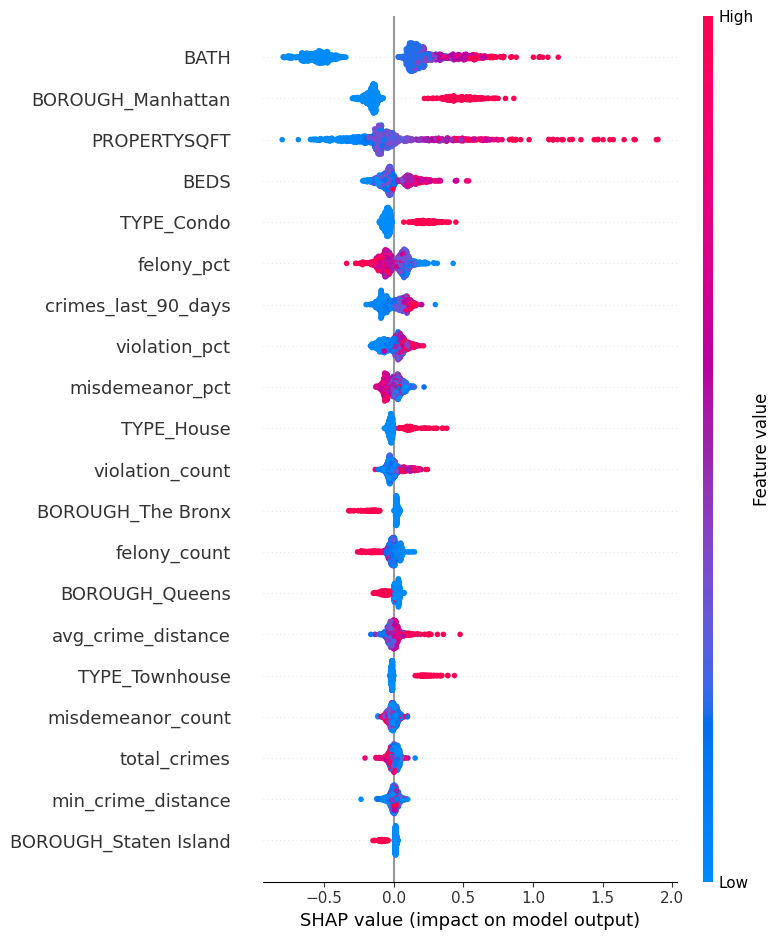

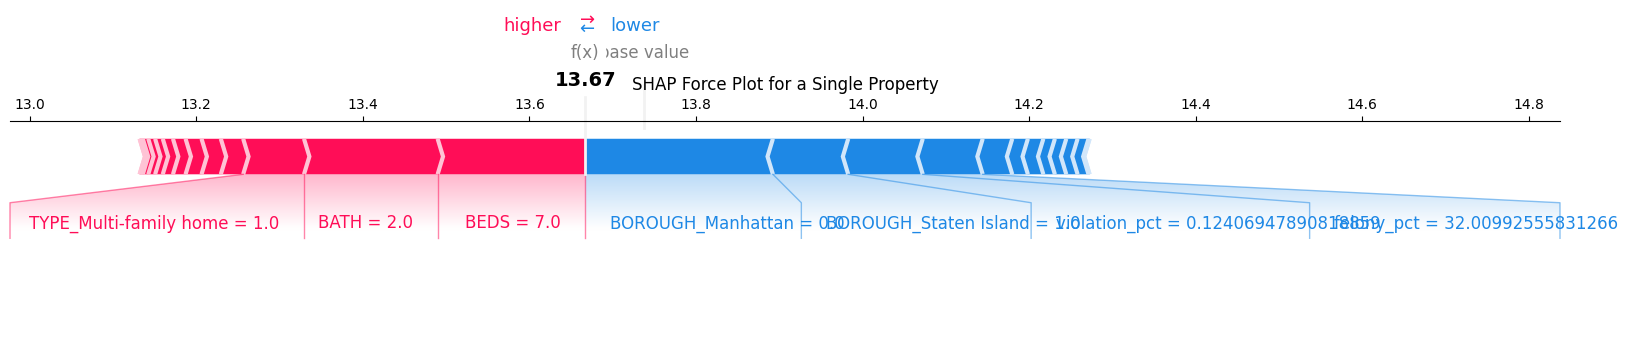

In [ ]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(xgbmod)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Get the base value (average log price prediction)
base_value = explainer.expected_value

# Visualize the explanation for the first test instance
shap.force_plot(
    base_value,
    shap_values[0, :],
    X_test.iloc[0, :],
    matplotlib=True,
    show=False
)
plt.title("SHAP Force Plot for a Single Property")
plt.show()

SHAP values demonstrate that property-specific attributes contribute the most to price (bath, bed, square footage).

The severity of crimes seem to weigh more in pricing, as percentage counts of crimes (felonies, violation, misdemeanor) contribute more than total counts in an area. The occurence of more recent crimes also weighs higher.